## Dominant Color Extraction for Image Segmentation
- **Image Segmentation**
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means such that each pixel will be reassigned to the closest of the K Colors, leading to segmentation

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2

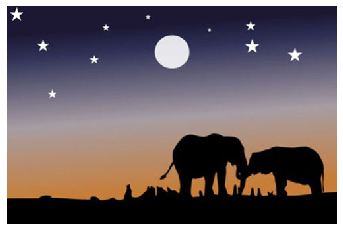

In [40]:
img = cv2.imread('elephant.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

In [42]:
original_shape = img.shape
print(img.shape)

(330, 500, 3)


In [43]:
## Flatten the image

img = img.reshape((-1, 3))
print(img.shape)

(165000, 3)


In [44]:
## Declare the number of Dominant Colors to be extracted

dominant_colors = 4

kmn = KMeans(n_clusters=dominant_colors)
kmn.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
## Dominant Colors are extracted as centers
## Convert centers to integers

centers = kmn.cluster_centers_
centers = np.array(centers, dtype='uint8')
print(centers)

[[ 38  35  64]
 [174 145 128]
 [  1   0   1]
 [ 99  95 118]]


### Plot the Dominant Colors

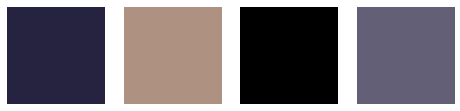

In [46]:
i = 1

plt.figure(0,figsize=(8,2))

colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()


### Segmenting the Original Image

In [49]:
new_img = np.zeros((330*500, 3), dtype='uint8')

for pix in range(new_img.shape[0]):
    new_img[pix] = colors[kmn.labels_[pix]]
    
new_img = new_img.reshape((original_shape))


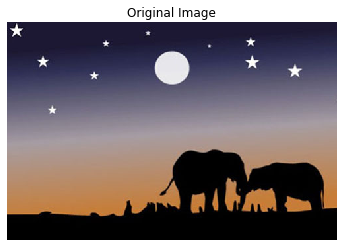

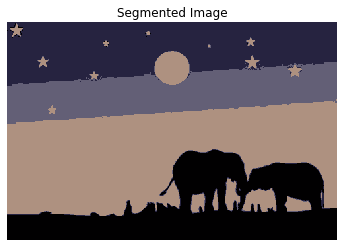

In [52]:
original = cv2.imread('elephant.jpg')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

plt.imshow(original)
plt.axis('off')
plt.title('Original Image')
plt.show()
plt.imshow(new_img)
plt.axis('off')
plt.title('Segmented Image')
plt.show()